In [3]:
# importacion datos ya depurados y organizados
import pandas as pd
!wget https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
df = pd.read_csv('SaleHousesColPreprocesado.csv')

--2023-10-22 22:52:19--  https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15263287 (15M) [text/plain]
Saving to: ‘SaleHousesColPreprocesado.csv’

SaleHousesColPrepro 100%[===================>]  14.56M  --.-KB/s    in 0.05s   

2023-10-22 22:52:19 (266 MB/s) - ‘SaleHousesColPreprocesado.csv’ saved [15263287/15263287]



In [21]:
df['longitud'].head(100)

0    -74.039581
1    -74.046137
2    -74.053574
3    -74.055616
4    -74.041790
        ...    
95   -74.054115
96   -74.098816
97   -74.051786
98   -74.082733
99   -74.097468
Name: longitud, Length: 100, dtype: float64

In [ ]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

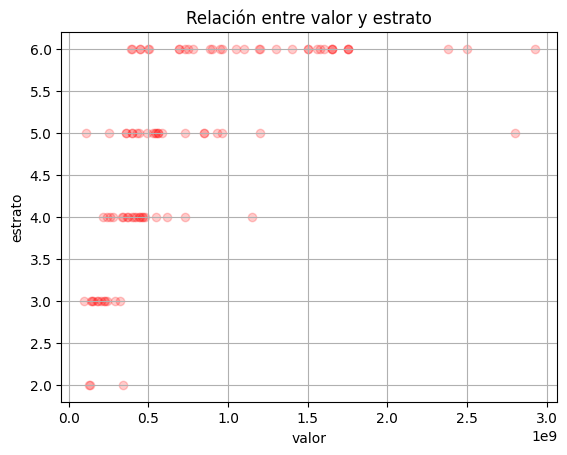

In [6]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['estrato'].head(100)

plt.scatter(d1, d2, color="red", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('estrato')  # Etiqueta del eje y
plt.title('Relación entre valor y estrato')  # Título del gráfico
plt.grid()
plt.show()


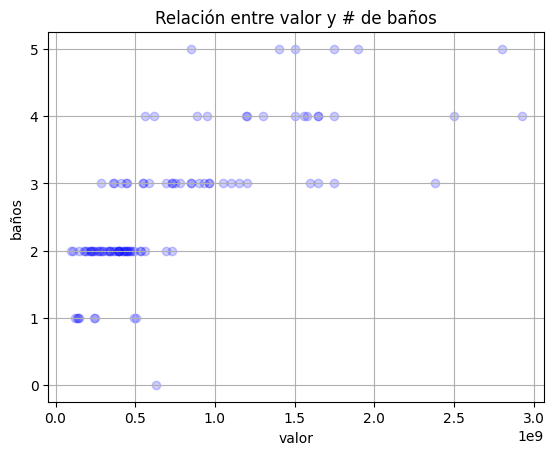

In [7]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['banos'].head(100)

plt.scatter(d1, d2, color="blue", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('baños')  # Etiqueta del eje y
plt.title('Relación entre valor y # de baños')  # Título del gráfico
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['banos'].head(100)

plt.scatter(d1, d2, color="blue", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('baños')  # Etiqueta del eje y
plt.title('Relación entre valor y # de baños')  # Título del gráfico
plt.grid()
plt.show()


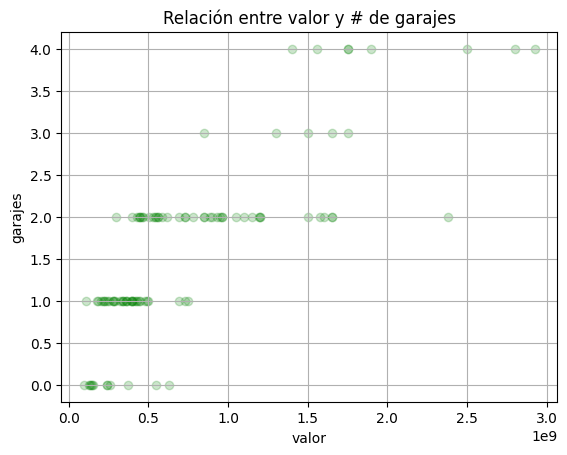

In [16]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['garajes'].head(100)

plt.scatter(d1, d2, color="green", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('garajes')  # Etiqueta del eje y
plt.title('Relación entre valor y # de garajes')  # Título del gráfico
plt.grid()
plt.show()


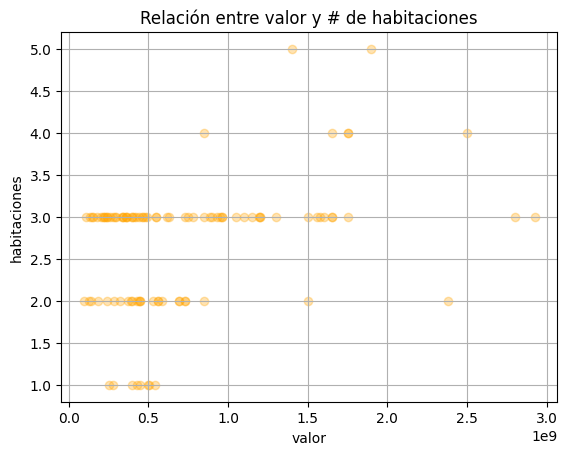

In [19]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['habitaciones'].head(100)

plt.scatter(d1, d2, color="orange", alpha=0.3)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('habitaciones')  # Etiqueta del eje y
plt.title('Relación entre valor y # de habitaciones')  # Título del gráfico
plt.grid()
plt.show()


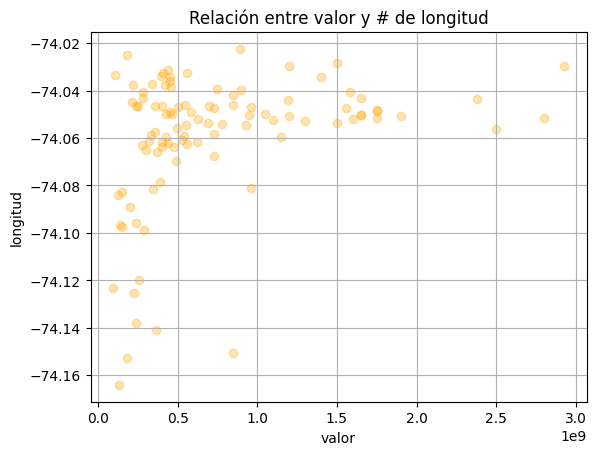

In [20]:
import matplotlib.pyplot as plt

d1 = df['valor'].head(100)
d2 = df['longitud'].head(100)

plt.scatter(d1, d2, color="orange", alpha=0.3)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('longitud')  # Etiqueta del eje y
plt.title('Relación entre valor y # de longitud')  # Título del gráfico
plt.grid()
plt.show()

In [35]:
df_null = df[['valor', 'estrato','banos','habitaciones','garajes']].dropna()

<ipython-input-46-1ca2e6b77f8c>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Precisión del model: -0.23
Coeficiente de determinacion R2: -0.23


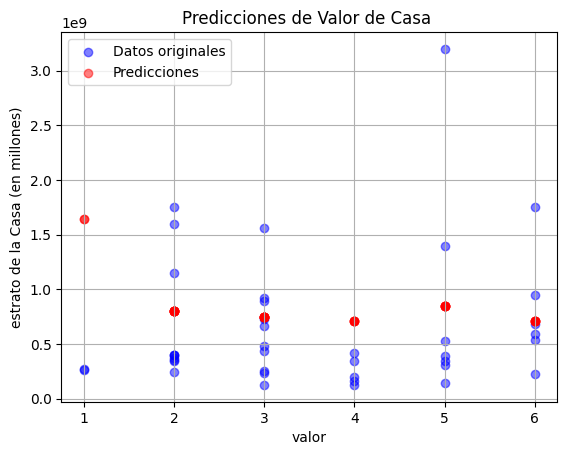

Para un precio de, [[50000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[100000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[200000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[300000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[500000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[1000000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.
Para un precio de, [[2500000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 707413298.18.


In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = np.array(df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(100)).reshape(-1, 1)
y = np.array(df_null ['valor'].head(400)).reshape(-1, 1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Regresión
rf_reg = RandomForestRegressor(n_estimators=100, random_state=44)

# Ajustar el modelo a los datos de entrenamiento
rf_reg.fit(X_train, y_train)
print(f"Precisión del model: {rf_reg.score(X_test, y_test):.2f}")
# Realizar predicciones en el conjunto de prueba
y_preds = rf_reg.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba (R²)

print(f"Coeficiente de determinacion R2: {r2_score(y_test,y_preds):.2f}")

# Visualizar los datos originales y las predicciones
plt.scatter(X_test,y_test, color='blue', label='Datos originales', alpha=0.5)
plt.scatter(X_test, y_preds, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('valor')
plt.ylabel('estrato de la Casa (en millones)')
plt.title('Predicciones de Valor de Casa ')
plt.legend()
plt.grid()
plt.show()

# Ejemplo de predicción
valor = [[[50000000]],[[100000000]],[[200000000]],[[300000000]],[[500000000]],[[1000000000]],[[2500000000]]]  # Supongamos un estrato de 4 para hacer una predicción
for i in valor:
  estrato_predicho = rf_reg.predict(i)
  print(f"Para un precio de, {i} millones de pesos, se predice un valor de casa de aproximadamente un estrato de: {estrato_predicho[0]:.2f}.")


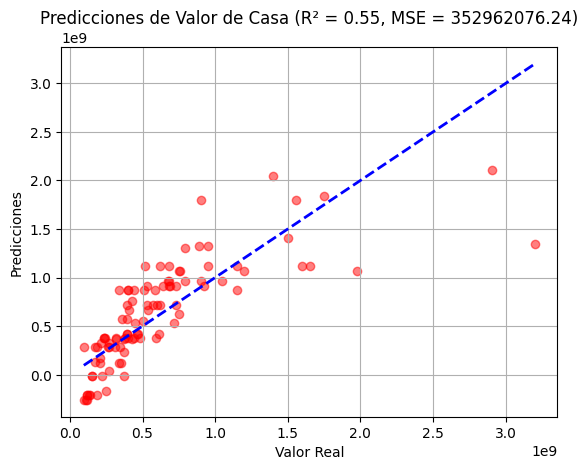

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Regresión Lineal Múltiple
mlr_reg = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
mlr_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = mlr_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)
mse = np.sqrt(mean_squared_error(y_test, y_preds))
# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MSE = {mse:.2f})')
plt.grid()
plt.show()


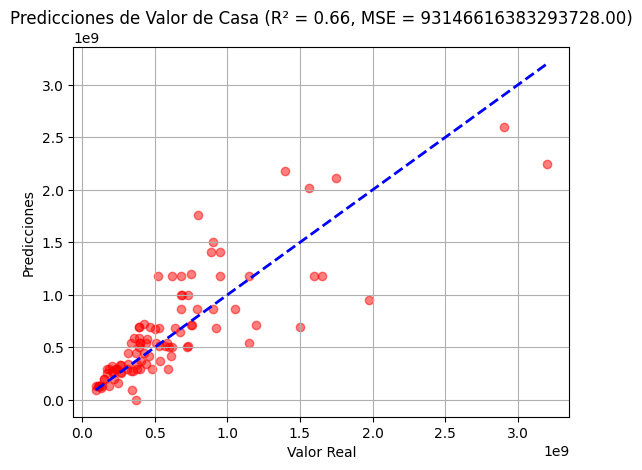

In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
dt_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = dt_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MSE = {mse:.2f})')
plt.grid()
plt.show()


ValueError: ignored

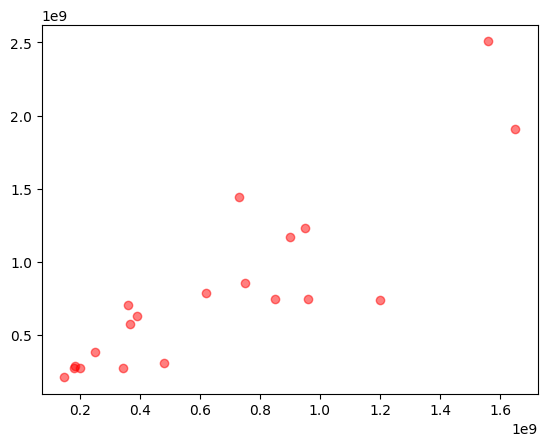

In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(100)
y = df_null['valor'].head(100)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = rf_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.scatter(X_test, y_test, linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MSE = {mse:.2f})')
plt.grid()
plt.show()


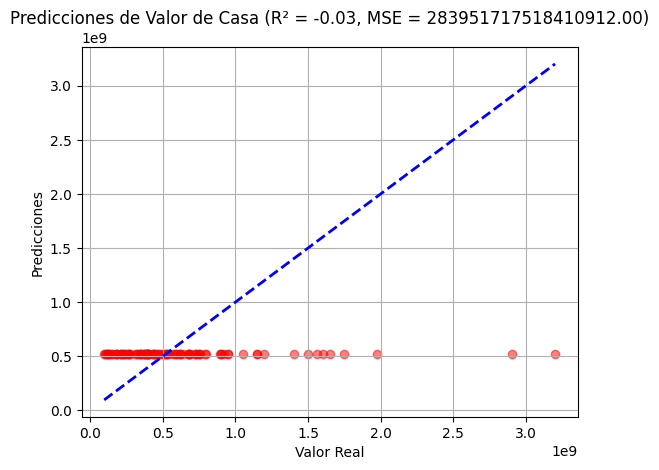

In [65]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Support Vector Machine (SVM) de regresión
svm_reg = SVR(gamma=100)

# Ajustar el modelo a los datos de entrenamiento
svm_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = svm_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MSE = {mse:.2f})')
plt.grid()
plt.show()


Precisión del model: -0.45


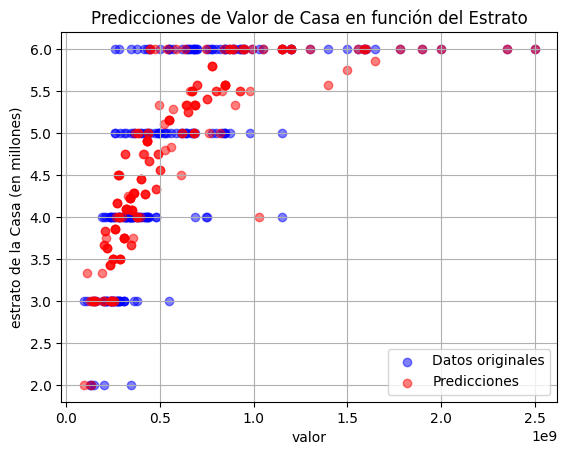

Para un precio de, [[50000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 2.00.
Para un precio de, [[100000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 2.00.
Para un precio de, [[200000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 3.67.
Para un precio de, [[300000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 4.00.
Para un precio de, [[500000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 4.56.
Para un precio de, [[1000000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 6.00.
Para un precio de, [[2500000000]] millones de pesos, se predice un valor de casa de aproximadamente un estrato de: 6.00.


In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear un modelo de regresión de árbol de decisión con una profundidad máxima de 2


# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = np.array(valor_estrato_not_null['valor'].head(1000)).reshape(-1, 1)
y = np.array(valor_estrato_not_null['estrato'].head(1000)).reshape(-1, 1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Regresión
dt = DecisionTreeRegressor(max_depth=15)
# Ajustar el modelo a los datos de entrenamiento
dt.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = dt.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba (R²)
print(f"Precisión del model: {dt.score(y_test,y_preds):.2f}")

# Visualizar los datos originales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos originales', alpha=0.5)
plt.scatter(X_test, y_preds, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('valor')
plt.ylabel('estrato de la Casa (en millones)')
plt.title('Predicciones de Valor de Casa en función del Estrato')
plt.legend()
plt.grid()
plt.show()

# Ejemplo de predicción
valor = [[[50000000]],[[100000000]],[[200000000]],[[300000000]],[[500000000]],[[1000000000]],[[2500000000]]]  # Supongamos un estrato de 4 para hacer una predicción
for i in valor:
  estrato_predicho = dt.predict(i)
  print(f"Para un precio de, {i} millones de pesos, se predice un valor de casa de aproximadamente un estrato de: {estrato_predicho[0]:.2f}.")


Precisión del model: -0.02
Coeficiente de determinacion R2: -0.02


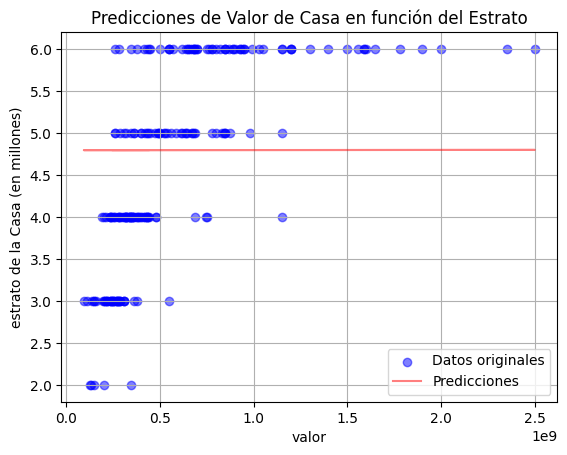

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = np.array(valor_estrato_not_null['valor'].head(1000)).reshape(-1, 1)
y = np.array(valor_estrato_not_null['estrato'].head(1000)).reshape(-1, 1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo
lr = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_preds = lr.predict(X_test)
# Calcular la precisión del modelo en el conjunto de prueba (R²)
print(f"Coeficiente de determinacion R2: {r2_score(y_test,y_preds):.2f}")
# Visualizar los datos originales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos originales', alpha=0.5)
plt.plot(X_test, y_preds, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('valor')
plt.ylabel('estrato de la Casa (en millones)')
plt.title('Predicciones de Valor de Casa en función del Estrato')
plt.legend()
plt.grid()
plt.show()

# Ejemplo de predicción
valor = [[50000000]]  # Supongamos un estrato de 4 para hacer una predicción
estrato_predicho = lr.predict(valor)
#print(f"Para un precio de, {valor[0]} millones de pesos, se predice un valor de casa de aproximadamente un estrato de: {estrato_predicho:.2f}.")

0.27144402994619377

Para un estrato de 5, se predicen aproximadamente 2.78 baños.


0.15549350168052467

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar la columna 'valor' que deseas normalizar
valor_column = valor_estrato_not_null['valor']

# Ajustar el escalador a los datos y transformar la columna
valor_normalized = scaler.fit_transform(valor_column.values.reshape(-1, 1))

# Crear una nueva columna en el DataFrame con los datos normalizados
valor_estrato_not_null['valor_normalized'] = valor_normalized

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coeficiente de determinacion R2: 0.38


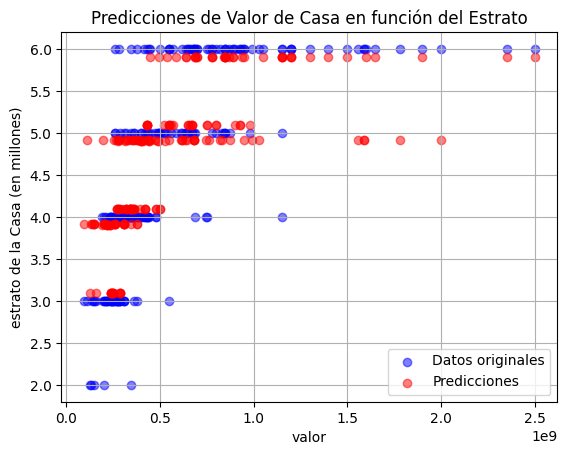

In [33]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Crear un modelo de regresión de svm_reg
svm_reg = SVR(gamma=100)

# Ajustar el modelo de svm_reg utilizando las características 'estrato' y 'banos'
X = np.array(valor_estrato_not_null['valor'].head(1000)).reshape(-1, 1)
y = np.array(valor_estrato_not_null['estrato'].head(1000)).reshape(-1, 1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo

# Ajustar el modelo a los datos de entrenamiento
svm_reg.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_preds = svm_reg.predict(X_test)
# Calcular la precisión del modelo en el conjunto de prueba (R²)
print(f"Coeficiente de determinacion R2: {r2_score(y_test,y_preds):.2f}")
# Visualizar los datos originales y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos originales', alpha=0.5)
plt.scatter(X_test, y_preds, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('valor')
plt.ylabel('estrato de la Casa (en millones)')
plt.title('Predicciones de Valor de Casa en función del Estrato')
plt.legend()
plt.grid()
plt.show()


Para un estrato de 5, se predicen aproximadamente 2.10 baños.


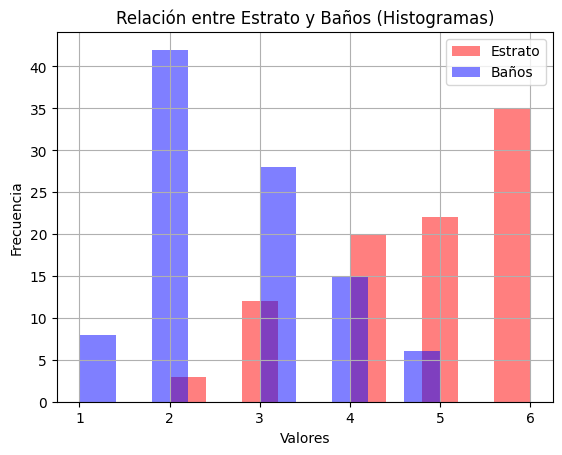

In [ ]:
import matplotlib.pyplot as plt

d1 = df['estrato'].head(100)
d2 = df['banos'].head(100)

# Crear histogramas para ambas variables
plt.hist(d1, bins=10, color='red', alpha=0.5, label='Estrato', density=False)
plt.hist(d2, bins=10, color='blue', alpha=0.5, label='Baños', density=False)

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Relación entre Estrato y Baños (Histogramas)')
plt.legend()
plt.grid()
plt.show()


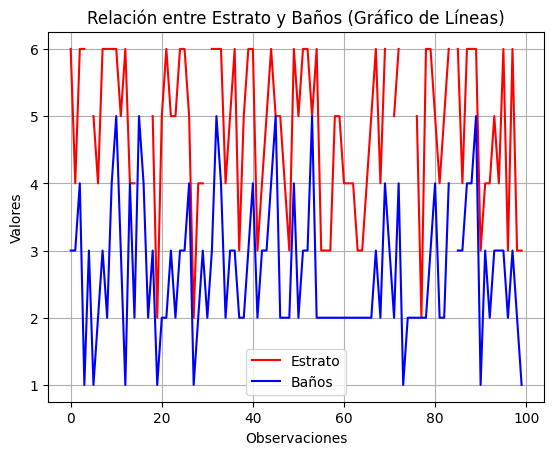

In [ ]:
import matplotlib.pyplot as plt

d1 = df['estrato'].head(100)
d2 = df['banos'].head(100)

# Crear un gráfico de líneas para 'estrato' y 'baños'
plt.plot(d1, label='Estrato', color='red')
plt.plot(d2, label='Baños', color='blue')

plt.xlabel('Observaciones')
plt.ylabel('Valores')
plt.title('Relación entre Estrato y Baños (Gráfico de Líneas)')
plt.legend()
plt.grid()
plt.show()


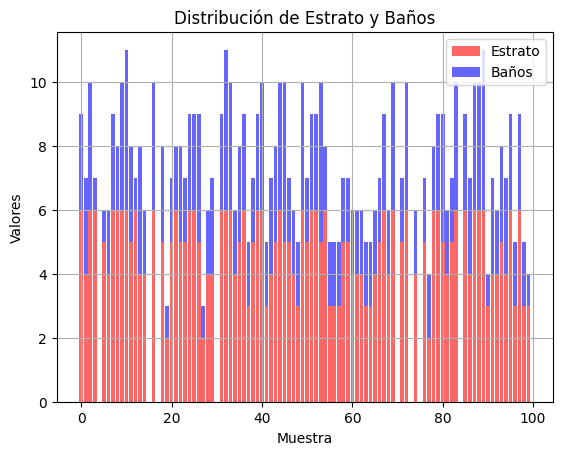

In [ ]:
import matplotlib.pyplot as plt

d1 = df['estrato'].head(100)
d2 = df['banos'].head(100)

# Crear gráficos de barras apilados
plt.bar(range(len(d1)), d1, color='red', alpha=0.6, label='Estrato')
plt.bar(range(len(d2)), d2, color='blue', alpha=0.6, label='Baños', bottom=d1)

plt.xlabel('Muestra')
plt.ylabel('Valores')
plt.title('Distribución de Estrato y Baños')
plt.legend()
plt.grid()
plt.show()


In [ ]:
d1 = df['valor']
d2 = df['banos']
x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.grid()
plt.legend();

AttributeError: ignored

In [ ]:
categorical_stats = df.describe(include=['object']).T
categorical_stats

,count,unique,top,freq
antiguedad_original,129076,10,Entre 10 y 20 años,34491
balcon,69235,4,Balcón,26301
banoservicio,1011,1,Si,1011
conjuntocerrado,59825,1,Si,59825
cuarto_de_escoltas,3306,1,Si,3306
cuartodeservicio,25124,1,Si,25124
depositoocuartoutil,50976,4,1,35445
depositos,36826,3,1,35445
estudioobiblioteca,52812,1,Si,52812
garajecubierto,63318,1,Si,63318


In [ ]:
categorical_columns = df.select_dtypes(include=['object'])

In [ ]:
categorical_stats = categorical_columns.describe().T
categorical_stats

,count,unique,top,freq
antiguedad_original,129076,10,Entre 10 y 20 años,34491
balcon,69235,4,Balcón,26301
banoservicio,1011,1,Si,1011
conjuntocerrado,59825,1,Si,59825
cuarto_de_escoltas,3306,1,Si,3306
cuartodeservicio,25124,1,Si,25124
depositoocuartoutil,50976,4,1,35445
depositos,36826,3,1,35445
estudioobiblioteca,52812,1,Si,52812
garajecubierto,63318,1,Si,63318


In [ ]:
categorical_stats = categorical_stats.dropna()


#corrmat = categorical_stats.corr()
#f, ax = plt.subplots(figsize=(12,9))
#sns.heatmap(corrmat,vmax=8,square=True)
categorical_stats

,count,unique,top,freq
antiguedad_original,129076,10,Entre 10 y 20 años,34491
balcon,69235,4,Balcón,26301
banoservicio,1011,1,Si,1011
conjuntocerrado,59825,1,Si,59825
cuarto_de_escoltas,3306,1,Si,3306
cuartodeservicio,25124,1,Si,25124
depositoocuartoutil,50976,4,1,35445
depositos,36826,3,1,35445
estudioobiblioteca,52812,1,Si,52812
garajecubierto,63318,1,Si,63318
